In [1]:
import matplotlib.pyplot as plt
import pandas
import numpy
import rba
import seaborn
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from rbatools.rba_session import SessionRBA




# General instructions on this notebook

## Starting of session
Here we initiate an rbatools.rba_session.SessionRBA with a model of B.subtilis. Variable 'model_filename' specifies where the RBA model is located and should be changed by the user. 

Upon initiation of session explicit exchange reactions for external metabolites are added, to facilitate conveinient acces to metabolite exchange rates.

#### 'Bacterial-RBA-models' directory with different bacterial RBA models can be obtained from: https://github.com/SysBioInra/Bacterial-RBA-models

#### --> Relevant rbatools.rba_ression.SessionRBA methods on used here, are '__init__' and 'add_exchange_reactions'.

In [3]:
print(SessionRBA.__doc__)


    User interface with high level functions to import model, change model,
    different solving methods and results export.

    Attributes
    ----------
    xml_dir : str
        Directory of imported xml model files
    model : rba.RbaModel
        RBA model (parsed from xml files), from which matrices are built
    Problem : rbatools.rba_problem.ProblemRBA
        RBA Problem
    Medium : dict
        Dictionary with external metabolites and corresponding concentrations
    ModelStructure : rbatools.rba_model_structure.ModelStructureRBA
        Model structure representation
    Results : dict
        Simulation results, added if record_results method has been called
    Parameters : dict
        Simulation parameters, added if record_parameters method has been called
    SimulationData : rbatools.rba_simulation_data.SimulationDataRBA
        SimulationData object, added if write_results method has been called
    SimulationParameters : rbatools.rba_simulation_parameters.Simulat

In [4]:
print(SessionRBA.__init__.__doc__)


        Creates SessionRBA object from files

        Parameters
        ----------
        xml_dir : str
            Path to the directory where rba-model files are located.
        


In [5]:
print(SessionRBA.add_exchange_reactions.__doc__)


        Adds explicit exchange-reactions of boundary-metabolites to RBA-problem,
        named R_EX_ followed by metabolite name (without M_ prefix).
        


In [2]:
model_filename = 'models/Escherichia-coli-K12-WT'
Simulation = SessionRBA(model_filename,lp_solver="glpk")
Simulation.add_exchange_reactions()

BIOSIM model 2


/usr/local/lib/python3.6/site-packages/scipy/sparse/lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/usr/local/lib/python3.6/site-packages/scipy/sparse/lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


## Simulation-results handling
Here we perform simple simulation runs and record the corresponding set of parameters and results.
After we have performed all desired simulations (and did the corresponding recordings) we write them to Simulation results object. From those objects the results and parameters can be exported into various formats.
#### --> Relevant rbatools.rba_session.SessionRBA methods used here, are 'find_max_growth_rate', 'record_results', 'record_parameters' and 'write_results'.

In [ ]:
print(Simulation.find_max_growth_rate.__doc__)

In [ ]:
print(Simulation.record_results.__doc__)

In [ ]:
print(Simulation.record_parameters.__doc__)

In [ ]:
print(Simulation.write_results.__doc__)

In [3]:
Simulation.find_max_growth_rate()
Simulation.record_results(runName="TestRun_1")
Simulation.record_parameters(runName="TestRun_1")

Simulation.find_max_growth_rate()
Simulation.record_results(runName="TestRun_2")
Simulation.record_parameters(runName="TestRun_2")

/Users/oliverbodeit/Desktop/RBA_tools_WIP/rbatools/rba_lp.py:149: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  oldA[tuple(rowsOld), tuple(colsOld)] = newA[tuple(rowsNew), tuple(colsNew)]


In [4]:
Simulation.write_results(session_name="TestSession")

## Simulation-results export
Here we export results and parameters into various formats, from the previously written data.
#### --> Relevant rbatools.rba_SimulationData.RBA_SimulationData methods used here, are 'export_sbtab', 'export_csv', 'export_escher_map' and 'export_proteo_map'.

In [ ]:
print(Simulation.SimulationData.export_sbtab.__doc__)

In [ ]:
print(Simulation.SimulationData.export_csv.__doc__)

In [ ]:
print(Simulation.SimulationData.export_escher_map.__doc__)

In [ ]:
print(Simulation.SimulationData.export_proteo_map.__doc__)

In [5]:
Simulation.SimulationData.export_sbtab(filename="Test_SimulationResults_SBtab")
Simulation.SimulationData.exportCSV()
Simulation.SimulationData.export_escher_map(type="fluxes")
Simulation.SimulationData.export_escher_map(type="investment")
Simulation.SimulationData.export_proteo_map(type='proto')
Simulation.SimulationData.export_proteo_map(type='isoforms')

KeyError: 'VariableID'

In [ ]:
print(Simulation.SimulationParameters.export_sbtab.__doc__)

In [ ]:
Simulation.SimulationParameters.export_sbtab(filename="Test_SimulationParameters_SBtab")

## Glucose screen
Here we iterate through a predefined list of glucose concentrations (glcs) and determine the corresponding maximum growth-rates and optimal configuration of exchange fluxes. Maximum growth-rate vs. glucose results in  a Monod curve
#### --> Relevant rbatools.rba_session.SessionRBA methods used here, are 'set_medium', 'find_max_growth_rate' and 'return_exchange_fluxes'.

In [3]:
print(Simulation.reload_model.__doc__)


        Reloads model from xml-files and then rebuild computational model-representation.
        


In [4]:
print(Simulation.set_medium.__doc__)


        Sets the concentration of specified growth-substrate(s) in medium.

        Parameters
        ----------
        changes : dict
            Keys : ID of metabolite(s) in medium.
            Values : New concention(s)
        


In [5]:
print(Simulation.find_max_growth_rate.__doc__)


        Applies dichotomy-search to find the maximal feasible growth-rate.

        Parameters
        ----------
        precision : float
            Numberic precision with which maximum is approximated.
            Default: 0.00001
        max : float
            Defines the highest growth rate to be screened for.
            Default: 4.0
        start_value : float
            Defines the first growth-rate to test during the dichotomy search.
            Default: numpy.nan --> then the middle between 0 and max is used.
        recording : bool
            Records intermediate feasible solutions
            while approaching the maximum growth-rate.
            Default: False
        feasibleStatuses : list of int
            List with identifiers of acceptable solution statuses.
            (consult ILOG-CPLEX documentation for information on them).
            Default: [1,5]
        try_unscaling_if_sol_status_is_five : bool
        	If true; the problem will be attempted to be 

In [6]:
print(Simulation.return_exchange_fluxes.__doc__)


        Generates a dictonary with the exchang-rates of boundary-metabolites.

        Returns
        -------
        Dictonary with exchange-keys and respective -rates.
        


In [7]:
Simulation.reload_model()

glcs=[0.005+(i*0.0025) for i in range(27)]
Results_glc_screen={"Mu":[],"M_glc__D":[],"M_o2":[],"M_ac":[],"M_dha":[]}
for glc_conc in glcs:
    Simulation.set_medium({'M_glc__D':glc_conc})
    mumax=Simulation.find_max_growth_rate(max=1.0)
    J_ex=Simulation.return_exchange_fluxes()
    for i in Results_glc_screen.keys():
        if i =="Mu":
            Results_glc_screen["Mu"].append(mumax)
        else:
            if i in J_ex.keys():
                Results_glc_screen[i].append(J_ex[i])
            else:
                Results_glc_screen[i].append(0)

BIOSIM model 2


/Users/oliverbodeit/Desktop/RBA_tools_WIP/rbatools/rba_lp.py:149: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  oldA[tuple(rowsOld), tuple(colsOld)] = newA[tuple(rowsNew), tuple(colsNew)]


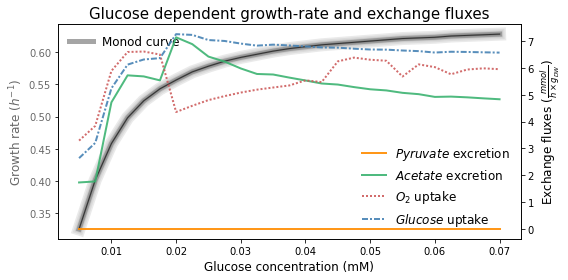

In [8]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.plot(glcs,Results_glc_screen["Mu"],linewidth=5,alpha=0.6,color="dimgray")
ax.legend(["Monod curve"],loc="upper left",fontsize=12,frameon=False)
ax.plot(glcs,Results_glc_screen["Mu"],linewidth=13,alpha=0.6,color="gainsboro")
ax.plot(glcs,Results_glc_screen["Mu"],linewidth=10,alpha=0.6,color="lightgray")
ax.plot(glcs,Results_glc_screen["Mu"],linewidth=7,alpha=0.6,color="silver")
ax.plot(glcs,Results_glc_screen["Mu"],linewidth=5,alpha=0.6,color="gray")
ax.plot(glcs,Results_glc_screen["Mu"],linewidth=2,alpha=0.6,color="dimgray")
ax.plot(glcs,Results_glc_screen["Mu"],linewidth=1,alpha=0.6,color="black")
ax2=ax.twinx()
ax2.plot(glcs,[i for i in Results_glc_screen["M_dha"]],linewidth=2,color="darkorange",alpha=0.9)
ax2.plot(glcs,[i for i in Results_glc_screen["M_ac"]],linewidth=2,color="mediumseagreen",alpha=0.9)
ax2.plot(glcs,[-i for i in Results_glc_screen["M_o2"]],linewidth=2,color="indianred",alpha=0.9,linestyle=(0, (1, 1)))
ax2.plot(glcs,[-i for i in Results_glc_screen["M_glc__D"]],linewidth=2,color="steelblue",alpha=0.9,linestyle=(0, (3, 1, 1, 1)))

ax2.legend(["$Pyruvate$ excretion","$Acetate$ excretion","$O_2$ uptake","$Glucose$ uptake"],loc="lower right",fontsize=12,frameon=False)

ax.set_title("Glucose dependent growth-rate and exchange fluxes",fontsize=15)
ax.set_xlabel("Glucose concentration (mM)",fontsize=12)
#ax.set_ylim(-0.01,0.79)
#ax.set_xlim(0.0,0.1)
ax.tick_params(axis='y', labelcolor="dimgrey")
ax2.tick_params(axis='y', labelcolor="black")
ax.set_ylabel("Growth rate ($h^{-1}$)",color="dimgrey",fontsize=12)
ax2.set_ylabel('Exchange fluxes ($\\frac{mmol}{h \\times g_{DW}}$)',color="black",fontsize=12)
#ax2.set_ylim(-0.2,15.6)
plt.tight_layout()
plt.show()



## Search for minimal required glucose concentration at different growth rates
Here we iterate through a predefined list of growth rates and determine the corresponding required concentration of glucose. Results in a Monod curve with switched axes.
#### --> Relevant rbatools.rba_session.SessionRBA methods used here, are 'set_growth_rate' and 'find_min_substrate_concentration'.

In [9]:
print(Simulation.set_growth_rate.__doc__)


        Sets growth-rate to desired value.

        Parameters
        ----------
        Mu : float
            Growth rate
        


In [10]:
print(Simulation.find_min_substrate_concentration.__doc__)


        Applies dichotomy-search to find the minimal feasible concentration of
        growth-substrate in medium, at a previously set growth-rate.

        Parameters
        ----------
        metabolite : str
            ID of metabolite in medium.
        precision : float
            Numberic precision with which minimum is approximated.
            Default: 0.00001
        max : float
            Defines the highest concentration rate to be screened for.
            Default: 100
        recording : bool
            Records intermediate feasible solutions
            while approaching the minimum concentration.
            Default: False

        Returns
        -------
        minimum feasible growth-substrate concentration as float.
        


In [ ]:
Simulation.reload_model()

mus=[(i+1)*0.025 for i in range(27)]
glcs=[]
for mu in mus:
    Simulation.set_growth_rate(mu)
    glcs.append(Simulation.find_min_substrate_concentration(metabolite="M_glc__D", precision=0.001, max=1.0))
    
    
    

BIOSIM model 2


In [ ]:
fig=plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)

ax.scatter(mus,glcs,s=10)
ax.set_title("Minimal required glucose concentration vs growth rate")
ax.set_ylabel("Glucose concentration ($mM$)",fontsize=8, labelpad=0.1)
ax.set_xlabel("Growth rate ($h^{-1}$)",fontsize=8, labelpad=1.5)
ax.set_ylim(0,0.1)
plt.show()

## Variability Analysis on substrate exchange fluxes
Here we iterate through a predefined list of growth rates (between 0 and the maximum wild-type growth rate) and determine the corresponding feasible ranges of glucose- and oxygen uptake. 
#### --> Relevant rbatools.rba_session.SessionRBA methods used here, are 'set_medium', 'set_growth_rate' and 'get_feasible_range'.

In [ ]:
print(Simulation.get_feasible_range.__doc__)

In [ ]:
Simulation.reload_model()

Simulation.set_medium({'M_glc__D':0.025})
mumax=Simulation.find_max_growth_rate()
Mus=[mumax*i for i in [0.01,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25,0.275,0.3,0.325,0.35,0.375,0.4,0.425,0.45,0.475,0.5,0.525,0.55,0.575,0.6,0.625,0.65,0.675,0.7,0.725,0.75,0.775,0.8,0.825,0.85,0.875,0.9,0.925,0.95,0.975,0.9825,0.99,0.9925,0.995,0.9975,1]]
Reactions_to_check=["R_EX_glc__D_e","R_EX_o2_e"]
Feasible_Ranges=dict(zip(Reactions_to_check,[{"Minima":[],"Maxima":[]},{"Minima":[],"Maxima":[]},{"Minima":[],"Maxima":[]}]))

for mu in Mus:
    Simulation.set_growth_rate(mu)
    Feasible_range=Simulation.get_feasible_range(variables=Reactions_to_check)
    for rxn in Reactions_to_check:
        Feasible_Ranges[rxn]["Minima"].append(Feasible_range[rxn]['Min'])
        Feasible_Ranges[rxn]["Maxima"].append(Feasible_range[rxn]['Max'])

In [ ]:
fig=plt.figure(figsize=(8,4))

ax = fig.add_subplot(111)

ax.fill_between(x=Mus,y1=Feasible_Ranges["R_EX_glc__D_e"]["Minima"],y2=Feasible_Ranges["R_EX_glc__D_e"]["Maxima"],interpolate=True,color='steelblue',alpha=0.25)
ax.plot(Mus,Feasible_Ranges["R_EX_glc__D_e"]["Minima"],color='steelblue',alpha=0.9,linewidth=2,linestyle=(0, (3, 1, 1, 1)))
ax.plot(Mus,Feasible_Ranges["R_EX_glc__D_e"]["Maxima"],color='steelblue',alpha=0.9,linewidth=2,linestyle=(0, (3, 1, 1, 1)))
ax2=ax.twinx()
ax2.fill_between(x=Mus,y1=Feasible_Ranges["R_EX_o2_e"]["Minima"],y2=Feasible_Ranges["R_EX_o2_e"]["Maxima"],interpolate=True,color='indianred',alpha=0.25)
ax2.plot(Mus,Feasible_Ranges["R_EX_o2_e"]["Minima"],color='indianred',alpha=0.9,linewidth=2,linestyle=(0, (1, 1)))
ax2.plot(Mus,Feasible_Ranges["R_EX_o2_e"]["Maxima"],color='indianred',alpha=0.9,linewidth=2,linestyle=(0, (1, 1)))

ax.tick_params(axis='y', labelcolor="royalblue")
ax2.tick_params(axis='y', labelcolor="indianred")
#ax.set_ylim(0.5,7.25)
#ax.set_yticks([1,2,3,4,5,6,7])
#ax.set_xlim(0,0.335)
#ax2.set_ylim(1,24)
#ax2.set_yticks([5,10,15,20])
#ax2.set_xlim(0,0.335)
#ax.set_xticks([0.05,0.1,0.15,0.2,0.25,0.3])
#ax2.set_xticks([0.05,0.1,0.15,0.2,0.25,0.3])
#ax.set_xticklabels([0.05,0.1,0.15,0.2,0.25,0.3])
#ax2.set_xticklabels([0.05,0.1,0.15,0.2,0.25,0.3])

ax.set_ylabel('$Glucose$ $\\frac{mmol}{h \\times g_{DW}}$)',fontsize=12,color="steelblue")
ax2.set_ylabel('$O_2$ $\\frac{mmol}{h \\times g_{DW}}$)',fontsize=12,color="indianred")

plt.title('Feasible uptake fluxes, over (sub-optimal) growth-rates',fontsize=15)
ax.set_xlabel('Growth-rate ($h^{-1}$)',fontsize=12)

plt.tight_layout()
plt.show()


## Pareto front
Here we investigate the pareto-efficient tradeoff between investment in additional ATP-expenditure and investment in additional (cytosolic) protein at different growth rates. In order to obtain an RBA-problem variable, representing the average cytosolic protein, we add a process (ID: P_Dummy_Cytosol and name: Dummy_process_Cytosol), without any function and a machinery composed of one average_protein_Cytoplasm, to the model and rebuild the session.

Then we determine the maximum wild-type growth-rate and define several growth-rates between 0 and the maximum. For each of those we then determine the pareto-front between the  variables 'P_Dummy_Cytosol' and 'R_maintenance_atp'. 
#### --> Relevant rbatools.rba_session.SessionRBA methods used here, are 'find_max_growth_rate', 'set_growth_rate', 'get_current_parameter_value' and 'get_pareto_front'.

In [ ]:
Simulation.reload_model()

test_process=rba.xml.processes.Process(id_="P_Dummy_Cytosol",name="Dummy_process_Cytosol")
test_process.machinery.machinery_composition.reactants._elements.append(rba.xml.common.SpeciesReference(species="average_protein_Cytoplasm", stoichiometry=1))
Simulation.model.processes.processes.append(test_process)

Simulation.rebuild_from_model()




In [ ]:
print(Simulation.get_current_parameter_value.__doc__)

In [ ]:
print(Simulation.get_pareto_front.__doc__)

In [ ]:
Simulation.set_medium({'M_glc__D':0.025})
mumax=Simulation.find_max_growth_rate(max=1.0)
Results_Pareto={}
total_AAconcentrations={}
for i in [0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]:
    Simulation.set_growth_rate(mumax*i)
    total_AAconcentrations[i]=Simulation.get_current_parameter_value(parameter="amino_acid_concentration")
    PF=Simulation.get_pareto_front(variable_X="P_Dummy_Cytosol_machinery", variable_Y="R_maintenance_atp", N=100, sign_VY='max')
    Results_Pareto[i]=PF    

Prot=[]
ATP=[]
Muma=[]
for i in Results_Pareto.keys():
    Muma.append([int(i*100)]*Results_Pareto[i].shape[0])
    ATP.append(list(Results_Pareto[i]["R_maintenance_atp"]))
    Prot.append(list(Results_Pareto[i]["P_Dummy_Cytosol_machinery"]*301/total_AAconcentrations[i]))



In [ ]:
import matplotlib as mpl

def fmt(x):
    s = f"{x/100:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return(s+" $\\mu_{max}$")

fig=plt.figure(figsize=(8*0.92439,4.025*0.92439))
ax = fig.add_subplot(111)
#ax.contourf(numpy.array(Prot), numpy.array(ATP), numpy.array(Muma),1000, cmap='Blues')
ax.contourf(numpy.array(Prot), numpy.array(ATP), numpy.array(Muma),1000, cmap='gist_yarg')
CS10 =ax.contour(numpy.array(Prot), numpy.array(ATP), numpy.array(Muma),levels=[10],colors='dimgray',linewidths=1)
CS20 =ax.contour(numpy.array(Prot), numpy.array(ATP), numpy.array(Muma),levels=[20],colors='dimgray',linewidths=1)
CS30 =ax.contour(numpy.array(Prot), numpy.array(ATP), numpy.array(Muma),levels=[30],colors='dimgray',linewidths=1)
CS40 =ax.contour(numpy.array(Prot), numpy.array(ATP), numpy.array(Muma),levels=[40],colors='lightgrey',linewidths=1)
CS50 =ax.contour(numpy.array(Prot), numpy.array(ATP), numpy.array(Muma),levels=[50],colors='lightgrey',linewidths=1)
CS60 =ax.contour(numpy.array(Prot), numpy.array(ATP), numpy.array(Muma),levels=[60],colors='lightgrey',linewidths=1)
CS70 =ax.contour(numpy.array(Prot), numpy.array(ATP), numpy.array(Muma),levels=[70],colors='gainsboro',linewidths=1)
CS80 =ax.contour(numpy.array(Prot), numpy.array(ATP), numpy.array(Muma),levels=[80],colors='gainsboro',linewidths=1)
CS90 =ax.contour(numpy.array(Prot), numpy.array(ATP), numpy.array(Muma),levels=[90],colors='gainsboro',linewidths=1)

#manual_locations_cs3 = [(0.03,Results_Pareto[i].loc[0,"R_maintenance_atp"]) for i in [0.9]]
labe20=ax.clabel(CS20, inline=True, fontsize=12,fmt=fmt ,rightside_up=False)
labe40=ax.clabel(CS40, inline=True, fontsize=12,fmt=fmt)
labe60=ax.clabel(CS60, inline=True, fontsize=12,fmt=fmt)
labe80=ax.clabel(CS80, inline=True, fontsize=12,fmt=fmt)
#ax.clabel(CS2, inline=True, fontsize=10,fmt=fmt)
#ax.clabel(CS3, inline=True, fontsize=10,fmt=fmt,manual=manual_locations_cs3)
#ax.plot(list(Results_Pareto[0.99]["P_Dummy_Cytosol_machinery"]*284/total_AAconcentrations[0.99]),list(Results_Pareto[0.99]["R_maintenance_atp"]),color="orange",linewidth=5,alpha=1)
ax.fill_between(x=list(Results_Pareto[0.99]["P_Dummy_Cytosol_machinery"]*284/total_AAconcentrations[0.99]),y1=[min(list(Results_Pareto[0.99]["R_maintenance_atp"]))]*len(list(Results_Pareto[0.99]["P_Dummy_Cytosol_machinery"])),y2=list(Results_Pareto[0.99]["R_maintenance_atp"]),interpolate=True,color='orange',alpha=1)

ax.set_ylim(8.8,36)
ax.set_xlim(-0.002,0.54)
ax.set_xticks([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5])
ax.set_xticklabels(["{}%".format(int(i*100)) for i in [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]])

#ax.set_title("Trade-off between additional protein-use and ATP-turnover",fontsize=15)
ax.set_title("Trade-off between protein- and ATP use vs. growth-rate",fontsize=15)
#ax.set_title("Trade-off of added protein- or ATP-demand and growth-rate",fontsize=15)
ax.set_ylabel("$ATP$-turnover ($\\frac{mmol}{h \\times g_{DW}}$)",fontsize=12)
#ax.set_xlabel("Cytosolic protein ($mmol_{AA} \\times g^{-1}_{DW}$)",fontsize=12)
ax.set_xlabel("Fraction of additional protein among total proteome",fontsize=12)


plt.tight_layout()
plt.show()

## Kapp sampling - global sensitivity analysis
Here we sample N global sets of enzyme efficiencies, by drawing multiplicative factors for each enzyme's forward- and backward efficiency form a log-normal distribution (base: e). The wild-type efficiencies are then multiplied with this factor and the maximum growth-rate and corresponding exchange fluxes of glucose, oxygen and acetate are determined. 

#### --> Relevant rbatools.rba_session.SessionRBA methods used here, are 'add_parameter_multipliers_for_enzyme_efficiencies', 'set_medium' and 'sample_kapp_multipliers'.

In [ ]:
print(Simulation.add_parameter_multipliers_for_enzyme_efficiencies.__doc__)

In [ ]:
print(Simulation.sample_kapp_multipliers.__doc__)

In [ ]:
STDEV_SAMPLING=numpy.log(1.1)
MEAN_SAMPLING=0

fig, ax= plt.subplots(1, 1)
ax=plt.hist([numpy.e**j for j in list(numpy.random.normal(loc=MEAN_SAMPLING,scale=STDEV_SAMPLING,size=500000))],200)
#plt.xlim(0,6)
plt.title("Distribution of multiplicative scaling factors")
plt.xlabel("(Multiplicative) scaling factor")
plt.ylabel("Frequency")
plt.show()

In [ ]:
N_SAMPLES=3

Simulation.reload_model()
enzymes=Simulation.add_parameter_multipliers_for_enzyme_efficiencies()
Simulation.set_medium({'M_glc__D':0.025})

KappScreenResults=Simulation.sample_kapp_multipliers(n=N_SAMPLES,mean=MEAN_SAMPLING,stdev=STDEV_SAMPLING,enzymes=enzymes,Variables_to_record=["R_EX_glc__D_e","R_EX_ac_e","R_EX_o2_e"])



In [ ]:
df=pandas.DataFrame(KappScreenResults)

fig, ax= plt.subplots(4, 1,figsize=(8,8))

seaborn.histplot(data=df.loc[(df["Mu"]!=4)&(df["Mu"]!=None)], x="Mu",ax=ax[0],alpha=0.3,color="dimgray", kde=False,line_kws={"linewidth":4,"alpha":1},bins=19,fill=True)
ax[0].legend(["Growth rate ($h^{-1}$)"],frameon=False,loc="upper right",fontsize=13)
ax[0].set_yticks([])
ax[0].set_ylabel("")
ax[0].set_xlabel("")

seaborn.histplot(data=df.loc[(df["R_EX_o2_e"]!=None)], x="R_EX_o2_e",ax=ax[1],alpha=0.3,color="indianred", kde=False,line_kws={"linewidth":4,"alpha":1},bins=15,fill=True)
ax[1].legend(["$O_2$ uptake: ($\\frac{mmol}{h \\times g_{DW}}$)"],frameon=False,loc="upper right",fontsize=13)
ax[1].set_yticks([])
ax[1].set_ylabel("")
ax[1].set_xlabel("")

seaborn.histplot(data=df.loc[(df["R_EX_glc_e"]!=None)], x="R_EX_glc_e",ax=ax[2],alpha=0.3,color="steelblue", kde=False,line_kws={"linewidth":4,"alpha":1},bins=20,fill=True)
ax[2].legend(["$Glucose$ uptake: ($\\frac{mmol}{h \\times g_{DW}}$)"],frameon=False,loc="upper right",fontsize=13)
ax[2].set_yticks([])
ax[2].set_ylabel("")
ax[2].set_xlabel("")

seaborn.histplot(data=-df.loc[(df["R_EX_ac_e"]!=None)], x="R_EX_ac_e",ax=ax[3],alpha=0.3,color="mediumseagreen", kde=False,line_kws={"linewidth":4,"alpha":1},bins=30,fill=True)
ax[3].legend(["$Acetate$ excretion: ($\\frac{mmol}{h \\times g_{DW}}$)"],frameon=False,loc="upper right",fontsize=13)
ax[3].set_yticks([])
ax[3].set_ylabel("")
ax[3].set_xlabel("")

ax[0].set_title("Cellular state variability from sampled enzyme efficiencies",fontsize=15)

plt.tight_layout()
plt.show()


## Ribosome efficiency sampling
Here we screen the impact of modulation of ribosome-capacity on the maximum growth-rate at different glucose concentrations. At each growth rate multiplicative modulators on ribosome-capacity between 0.01 and 100 are applied and the maximum growth-rate is determined.
#### --> Relevant rbatools.rba_session.SessionRBA methods used here, are 'add_parameter_multiplier', 'setMedium' and 'screen_multipliers'.

In [ ]:
print(Simulation.add_parameter_multiplier.__doc__)

In [ ]:
print(Simulation.screen_multipliers.__doc__)

In [ ]:
Glucose_concentrations=[0.0125,0.025,0.05,0.1,1]

Simulation.reload_model()
Simulation.add_parameter_multiplier(model_parameter="ribosome_capacity",rebuild_model=True)
log_factors=[-2,-1.5,-1,-0.5,0,0.5,1,1.5,2]

Results={}
for glc_conc in Glucose_concentrations:
    Simulation.set_medium({'M_glc__D':glc_conc})
    screen_results=Simulation.screen_multipliers(parameter="ribosome_capacity",factors=[10**i for i in log_factors])
    scaling_factors , growth_rates = [list(i) for i in zip(*screen_results.items())]
    Results[glc_conc]={"Scaling Factors":scaling_factors,"Growth_rates":[i["Mu"] for i in growth_rates]}



In [ ]:
color_dict={0.0125:"lightsteelblue",0.025:"orange",0.05:"lightsteelblue",0.1:"steelblue",1:"steelblue"}
alpha_dict={0.0125:0.3,0.025:0.8,0.05:0.7,0.1:0.4,1:1}

fig=plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)

log_scaling_coeffs=[numpy.log10(i) for i in Results[glc_conc]["Scaling Factors"]]
for glc_conc in reversed(Glucose_concentrations):
    if glc_conc in color_dict.keys():
        ax.scatter(log_scaling_coeffs,Results[glc_conc]["Growth_rates"],color=color_dict[glc_conc],alpha=1,s=50,edgecolor='none')
plt.legend(["$Glucose$ : {} $mM$".format(glc_conc) for glc_conc in reversed(Glucose_concentrations) if glc_conc in color_dict.keys()],fontsize=12,frameon=False)
ax.vlines(x=0,ymin=0,ymax=1.6,linestyles="dashed",color="black",linewidth=1,alpha=0.3)
for glc_conc in Glucose_concentrations:
    if glc_conc in color_dict.keys():
        ax.plot(log_scaling_coeffs,Results[glc_conc]["Growth_rates"],color=color_dict[glc_conc],alpha=alpha_dict[glc_conc])
for glc_conc in Glucose_concentrations:
    #ax.scatter(log_scaling_coeffs,Results[glc_conc]["Growth_rates"],color="red",alpha=1,s=55,edgecolor='face')
    if glc_conc in color_dict.keys():
        ax.scatter([numpy.log10(i) for i in Results[glc_conc]["Scaling Factors"]],Results[glc_conc]["Growth_rates"],color=color_dict[glc_conc],alpha=alpha_dict[glc_conc],s=50,edgecolor='none')

ax.set_title("Effect of ribosome capacity modulation on growth-rate",fontsize=15)
ax.set_xlabel("Scaling factor ribosome capacity",fontsize=12)
ax.set_ylabel("Growth-rate ($h^{-1}$)",fontsize=12)
ax.set_xticks([-2,-1,1,2,0])
ax.set_xticklabels([str("$10^{"+str(i)+"}$") for i in [-2,-1,1,2]]+[str(1)])
#ax.set_ylim(-0.02,1.5)

plt.tight_layout()
plt.show()







## Local sensitivity analysis of growth rate vs. ribosome capacity over glucose concentrations
Here we perform local sensitivity analysis of maximum growth-rate on ribosome- and glucose-uptake (PTSG-system) efficiency at different glucose concentrations. Local sensitivity is represented as the partial derivative of maximum growth-rate vs. model-parameter values at wild-type. 

Absolute sensitivity represents the the change in growth-rate per change in parameter value.
Scaled sensitivity represents the relative change in growth-rate per relative change in parameter value.
#### --> Relevant rbatools.rba_session.SessionRBA methods used here, are 'add_parameter_multiplier', 'setMedium' and 'local_sensitivity'.

In [ ]:
print(Simulation.local_sensitivity.__doc__)

In [ ]:
Simulation.reload_model()

Glucose_concentrations=[0.00625*(i+1) for i in range(16)]

Local_sensitivities={}
for glc_conc in Glucose_concentrations:
    Simulation.set_medium({'M_glc__D':glc_conc})
    res=Simulation.local_sensitivity(parameters=["ribosome_capacity"],relative_parameter_difference=0.01)
    Local_sensitivities[glc_conc]=res




In [ ]:
fig=plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)

ax.plot([glc_conc for glc_conc in Glucose_concentrations if glc_conc<=1],[Local_sensitivities[glc_conc].loc["ribosome_capacity","Scaled_Sensitivity"] for glc_conc in Glucose_concentrations if glc_conc<=1],
                color="indianred",
                linewidth=2,
                linestyle="dashed")
ax.scatter([glc_conc for glc_conc in Glucose_concentrations if glc_conc<=1],[Local_sensitivities[glc_conc].loc["ribosome_capacity","Scaled_Sensitivity"] for glc_conc in Glucose_concentrations if glc_conc<=1],
                color="indianred")
ax2=ax.twinx()
ax2.plot([glc_conc for glc_conc in Glucose_concentrations if glc_conc<=1],[Local_sensitivities[glc_conc].loc["ribosome_capacity","Absolute_Sensitivity"] for glc_conc in Glucose_concentrations if glc_conc<=1],
                color="steelblue",
                linewidth=2,
                linestyle="dashed")
ax2.scatter([glc_conc for glc_conc in Glucose_concentrations if glc_conc<=1],[Local_sensitivities[glc_conc].loc["ribosome_capacity","Absolute_Sensitivity"] for glc_conc in Glucose_concentrations if glc_conc<=1],
                color="steelblue")

ax.set_title("Local sensitivities ribosome_capacity at $WT$ capacity")
ax.set_xlabel("Glucose concentration ($mM$)", labelpad=0.1)
ax.set_ylabel("Scaled sensitivity",color="indianred")
ax2.set_ylabel('Absolute sensitivity',color="steelblue")

#ax.set_xlim(0,0.065)
#ax2.set_xlim(0,0.065)
plt.show()


## Gene KO

Here we apply single knock-outs for all genes, associated with non-transport metabolic reactions and evaluate their effects on the maximum growth-rate.

#### --> Relevant rbatools.rba_session.SessionRBA methods used here, are 'setMedium', 'find_max_growth_rate', 'get_reactions', 'get_reaction_information', 'apply_gene_knock_out', 'set_growth_rate', 'solve' and  'undo_gene_knock_out'.

In [ ]:
print(Simulation.get_reactions.__doc__)

In [ ]:
print(Simulation.get_reaction_information.__doc__)

In [ ]:
print(Simulation.apply_gene_knock_out.__doc__)

In [ ]:
print(Simulation.solve.__doc__)

In [ ]:
print(Simulation.undo_gene_knock_out.__doc__)

In [ ]:
Simulation.reload_model()

Simulation.set_medium({'M_glc__D':0.1})
mu_WT=Simulation.find_max_growth_rate()

KO_mus={}
count=0
for rxn in Simulation.get_reactions(): # iterate over all model reactions
    if count>=30:
        break
    rxn_info=Simulation.get_reaction_information(rxn) # retrieve information on reaction
    if rxn_info['Type'] == 'Normal': # Only continue if reaction is not transport
        if rxn_info['Enzyme']!='': # Only continue if reaction has associated enzyme
            try:
                rxn_subunits=list(Simulation.get_enzyme_information(rxn_info['Enzyme'])['Subunits'].keys()) 
                # All proteins associated with reaction's enzyme
                for rxn_su in rxn_subunits:
                    if not rxn_su in KO_mus.keys(): #only continue if proteins has not bee checked before
                        Simulation.apply_gene_knock_out(gene=rxn_su) # knock out protein
                        #check whether wild-type growth-rate is feasible
                        Simulation.set_growth_rate(mu_WT) 
                        mu_WT_feasible=Simulation.solve()
                        if not mu_WT_feasible: # if WT growth rate is not feasible we have to find the maximum one
                            # Ergo: (mu_max < mu_WT)
                            #check whether cell can grow at all with knock-out
                            Simulation.set_growth_rate(0.0)
                            mu_zero_feasible=Simulation.solve()
                            if not mu_zero_feasible:
                                # if growth rate 0 is infeasible, cell is growth-deficient 
                                # Ergo: (mu_max = 0)
                                KO_mus.update({rxn_su:0})
                            else:
                                # if growth rate 0 is feasible, we have to find the maximum growth rate 
                                # Ergo: (0 < mu_max < mu_WT)
                                KO_mus.update({rxn_su:Simulation.find_max_growth_rate(max=mu_WT)})
                        else: 
                            # if WT growth-rate is feasible, we dont need to run the search for maximum growth-rate.
                            # Ergo: (mu_max = mu_WT)
                            KO_mus.update({rxn_su:mu_WT})
                        Simulation.undo_gene_knock_out(gene=rxn_su) # undo gene-KO
                    count+=1
            except:
                if not rxn_su in KO_mus.keys():
                    KO_mus.update({rxn_su:numpy.nan})


In [ ]:
KO_effects=pandas.DataFrame()
for i in KO_mus.keys():
    if numpy.isfinite(KO_mus[i]):
        KO_effects.loc[i,"Gene"]=i
        KO_effects.loc[i,"Mu"]= KO_mus[i]
        if KO_mus[i] == mu_WT:
            KO_effects.loc[i,"KO effect"]= "No effect"
        elif KO_mus[i] == 0:
            KO_effects.loc[i,"KO effect"]= "Growth deficiency"
        else:
            KO_effects.loc[i,"KO effect"]= "Growth-rate reduction"


number_growth_deficiency=KO_effects.loc[KO_effects["KO effect"]=="Growth deficiency"].shape[0]      
number_growth_reduction=KO_effects.loc[KO_effects["KO effect"]=="Growth-rate reduction"].shape[0]      
number_no_effect=KO_effects.loc[KO_effects["KO effect"]=="No effect"].shape[0]      

print("Number of genes without effect on growth-rate: {}".format(number_no_effect))
print("Number of genes with growth-deficiency effect: {}".format(number_growth_deficiency))
print("Number of genes with reducing effect on growth-rate: {}".format(number_growth_reduction))


In [ ]:
fig=plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
hist=ax.hist(KO_effects.loc[KO_effects["KO effect"]=="Growth-rate reduction","Mu"],15)
ax.set_title("Distribution of maximum growth-rates with gene KOs")
ax.set_xlabel("Growth-rate")
ax.set_ylabel("Frequency")

## Double KO - epistasis


#### --> Relevant rbatools.rba_session.SessionRBA methods used here, are 

## Metabolic engineering


#### --> Relevant rbatools.rba_session.SessionRBA methods used here, are 

